In [ ]:
import numpy as np
import scipy as sp
from scipy import misc, stats
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import plotly.plotly as py
import seaborn as sns

%matplotlib inline

In [31]:
DIRNAME = '../data/images/'
COLOR = {'red': 0,
         'green': 1,
         'blue': 2}  # RGB

In [3]:
with open('Dataset_tune.txt') as f:
    image_names = ['im'+ x.strip()+'.jpg' for x in f.readlines()]

## 2. Для каждого канала цвета каждого изображения из тестового пакета вычислить следующие характеристики:

In [4]:
image_names[:5]

['im16018.jpg', 'im2832.jpg', 'im10328.jpg', 'im16071.jpg', 'im22284.jpg']

In [5]:
len(image_names)

5000

In [33]:
data = {}
for name, num in COLOR.items():
    data[name] = pd.DataFrame()
    for image_name in image_names[:1000]:
        image = np.array(Image.open(DIRNAME+image_name))
        a = image[:, :, num].ravel()
        d = {'name': image_name,
             'min': np.min(a),
             'max': np.max(a),
             'mean': np.mean(a),
             'var': np.var(a),
             'median': np.median(a),
             'interquartile': sp.stats.iqr(a),
             'skewness': sp.stats.skew(a),
             'kurtosis': sp.stats.kurtosis(a)}
        data[name] = pd.concat([data[name], pd.DataFrame(pd.DataFrame(d, index=[0,]))], ignore_index=True)

In [37]:
data['blue'].head()

,interquartile,kurtosis,max,mean,median,min,name,skewness,var
0,45.0,0.421079,255,45.580790,41.0,0,im16018.jpg,0.615814,1024.438924
1,157.0,-1.278983,255,154.111294,157.0,0,im2832.jpg,-0.251882,6726.445485
2,174.0,-1.434889,255,106.175979,60.0,0,im10328.jpg,0.583531,7265.348274
3,64.0,-1.155102,178,68.568731,75.0,0,im16071.jpg,-0.415416,1354.069329
4,145.0,-1.432003,255,105.647718,110.0,0,im22284.jpg,0.021974,5578.253765


In [38]:
data['red'].head()

,interquartile,kurtosis,max,mean,median,min,name,skewness,var
0,41.0,0.399050,255,41.468431,36.0,0,im16018.jpg,0.789478,897.363995
1,146.0,-1.224572,255,153.781394,156.0,0,im2832.jpg,-0.219189,6214.021990
2,104.0,-0.735921,234,121.656235,149.0,0,im10328.jpg,-0.930703,4209.820332
3,113.0,-0.882227,255,155.734336,172.0,0,im16071.jpg,-0.484947,5471.229412
4,146.0,-1.263383,255,132.356751,156.0,0,im22284.jpg,-0.408834,6317.783450


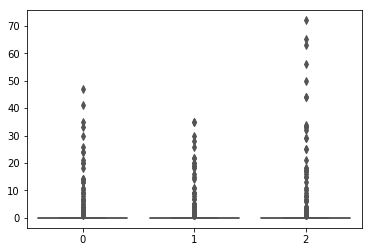

In [90]:
sns.boxplot(data=[data['blue']['min'], data['green']['min'], data['red']['min'],], palette="muted")

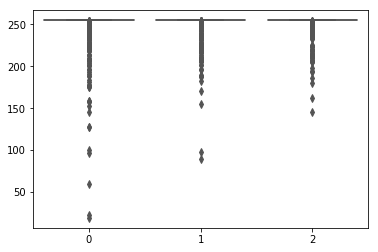

In [91]:
sns.boxplot(data=[data['blue']['max'], data['green']['max'], data['red']['max'],], palette="muted")

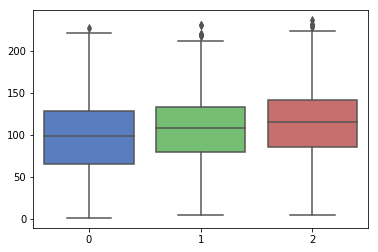

In [92]:
sns.boxplot(data=[data['blue']['mean'], data['green']['mean'], data['red']['mean'],], palette="muted")

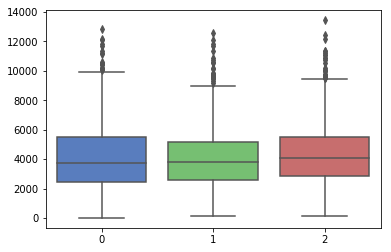

In [93]:
sns.boxplot(data=[data['blue']['var'], data['green']['var'], data['red']['var'],], palette="muted")

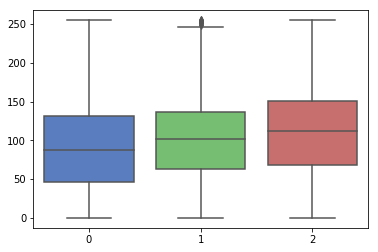

In [97]:
sns.boxplot(data=[data['blue']['median'], data['green']['median'], data['red']['median'],], palette="muted")

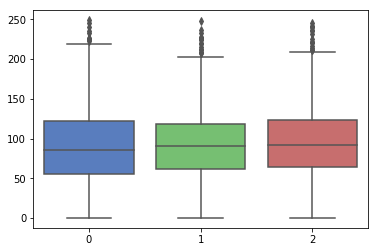

In [98]:
sns.boxplot(data=[data['blue']['interquartile'], data['green']['interquartile'], data['red']['interquartile'],], palette="muted")

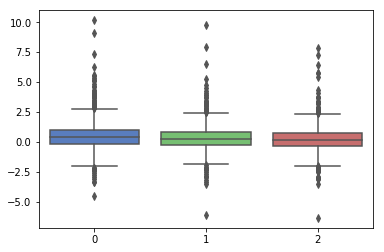

In [95]:
sns.boxplot(data=[data['blue']['skewness'], data['green']['skewness'], data['red']['skewness'],], palette="muted")

In [ ]:
a = []
for image_name in image_names[:1000]:
    image = np.array(Image.open(DIRNAME+image_name))
    a.extend(image[:, :, 0].ravel())
    
plt.hist(np.array(a), bins=255)
plt.ylabel('Probability');

In [43]:
image = Image.open(DIRNAME+image_names[0])

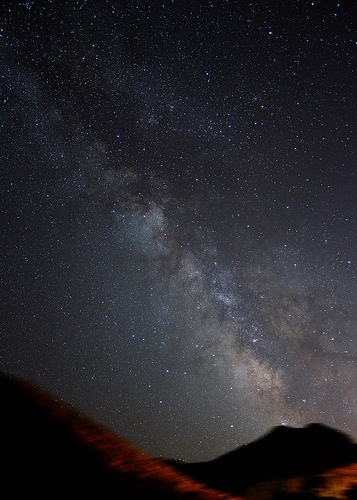

In [44]:
image

In [45]:
im = np.array(image)

In [46]:
im.shape

(500, 357, 3)

In [47]:
a = im[:, :, 0].ravel()

In [48]:
a

array([3, 4, 3, ..., 0, 0, 0], dtype=uint8)

In [49]:
d = {'name': image_name,
             'min': np.min(a),
             'max': np.max(a),
             'mean': np.mean(a),
             'var': np.var(a),
             'median': np.median(a),
             'interquartile': sp.stats.iqr(a),
             'skewness': sp.stats.skew(a),
             'kurtosis': sp.stats.kurtosis(a)}

In [50]:
d

{'interquartile': 41.0,
 'kurtosis': 0.3990497726681217,
 'max': 255,
 'mean': 41.46843137254902,
 'median': 36.0,
 'min': 0,
 'name': 'im12722.jpg',
 'skewness': 0.7894777873170853,
 'var': 897.36399501839969}

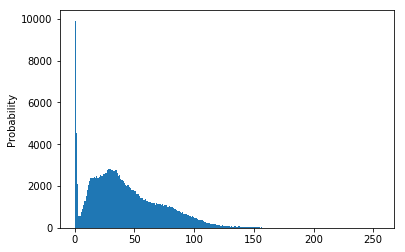

In [51]:
plt.hist(a, bins=255)
plt.ylabel('Probability');

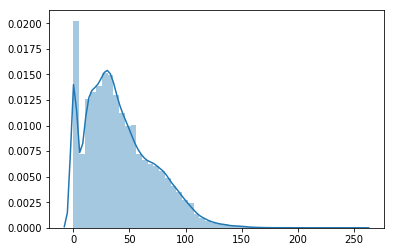

In [52]:
sns.distplot(a)

In [17]:
s = a.shape

In [18]:
s[0]

178500

In [19]:
500 * 357

178500

In [20]:
z = (a - a.mean())/a.std()

In [21]:
data = z[:]
distributions = [sp.stats.laplace, sp.stats.norm, sp.stats.beta, sp.stats.gamma, sp.stats.lognorm]
mles = []

for distribution in distributions:
    pars = distribution.fit(data)
    mle = distribution.nnlf(pars, data)
    mles.append(mle)

results = [(distribution.name, mle) for distribution, mle in zip(distributions, mles)]
best_fit = sorted(zip(distributions, mles), key=lambda d: d[1])[0]
print('Best fit reached using {}, MLE value: {}'.format(best_fit[0].name, best_fit[1]))

/home/sasha253c/myprog/kpi/progonov/progonov_labs/.venv/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:404: RuntimeWarning:

invalid value encountered in sqrt



Best fit reached using beta, MLE value: 196823.16410886042


In [22]:
results

[('laplace', 263638.30605747236),
 ('norm', 253280.52817703411),
 ('beta', 196823.16410886042),
 ('gamma', 235731.46862827905),
 ('lognorm', 239050.72516586893)]

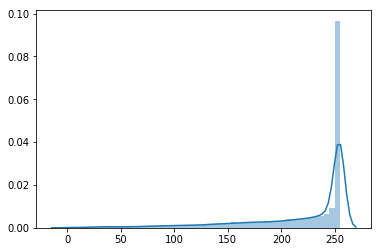

In [41]:
sns.distplot(a)

In [23]:
sp.stats.normaltest(a)

NormaltestResult(statistic=15426.443237142308, pvalue=0.0)

In [24]:
sp.stats.binom_test(a)

ValueError: Incorrect length for x.

In [28]:
stats.describe(a)

DescribeResult(nobs=178500, minmax=(0, 255), mean=41.46843137254902, variance=897.36902229583552, skewness=0.7894777873170853, kurtosis=0.3990497726681217)

In [29]:
d

{'interquartile': 41.0,
 'kurtosis': 0.3990497726681217,
 'max': 255,
 'mean': 41.46843137254902,
 'median': 36.0,
 'min': 0,
 'name': 'im12722.jpg',
 'skewness': 0.7894777873170853,
 'var': 897.36399501839969}

/home/sasha253c/myprog/kpi/progonov/progonov_labs/.venv/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:404: RuntimeWarning:

invalid value encountered in sqrt

/home/sasha253c/myprog/kpi/progonov/progonov_labs/.venv/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:2303: RuntimeWarning:

invalid value encountered in double_scalars



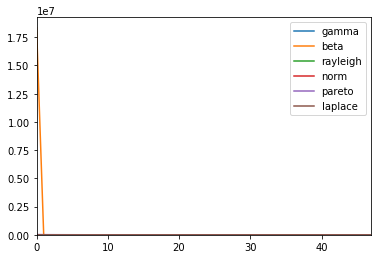

In [24]:
size = 178500
x = sp.arange(size)
y = a
h = plt.hist(y, bins=range(48), color='w')

dist_names = ['gamma', 'beta', 'rayleigh', 'norm', 'pareto', 'laplace']

for dist_name in dist_names:
    dist = getattr(sp.stats, dist_name)
    param = dist.fit(y)
    pdf_fitted = dist.pdf(x, *param[:-2], loc=param[-2], scale=param[-1]) * size
    plt.plot(pdf_fitted, label=dist_name)
    plt.xlim(0,47)
plt.legend(loc='upper right')
plt.show()

In [38]:
a

array([3, 4, 3, ..., 0, 0, 0], dtype=uint8)

In [39]:
z

array([-1.28416301, -1.25078076, -1.28416301, ..., -1.38430978,
       -1.38430978, -1.38430978])

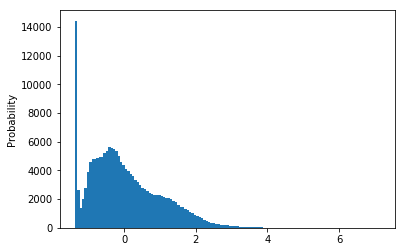

In [44]:
plt.hist(z, bins=128)
plt.ylabel('Probability');

In [45]:
z1  = a - sum(a)

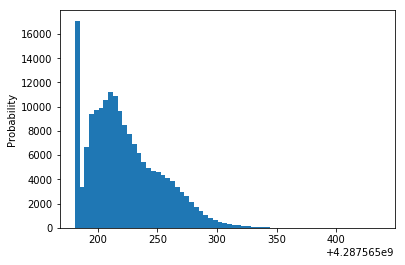

In [47]:
plt.hist(z1, bins=64)
plt.ylabel('Probability');